# Metrics exploration notebook

In [1]:
import tifffile as tiff
import numpy as np
import matplotlib
import time
from matplotlib import pyplot as plt
from IPython.display import Video

import sys

sys.path.insert(0, '../')

plt.rcParams["animation.html"] = "jshtml" 
plt.rcParams["animation.embed_limit"] = "500"  # size limit in MB

# Font size
plt.style.use('default')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%reload_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

In [2]:
from modules.utils import make_video

def frame_gen(video, scores=None, lt=0.9):
    std = video[0].std()
    print('calculated std')
    low = np.quantile(video[0], q=0.01)
    if scores is not None:
        for img, score in zip(video, scores):
            img = (img - low) / std * 255 / 3
            img[img < 0] = 0
            img[img > 255] = 255
            img = img.astype(np.uint8)
            if score < lt:
                img[:50, :50] = 255
            else:
                img[:50, :50] = 0
            yield img
    else:
        for img in video:
            img = (img - low) / std * 255 / 3
            img[img < 0] = 0
            img[img > 255] = 255
            img = img.astype(np.uint8)
            yield img

In [3]:
orig_examples = [
    '../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/denoised_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/denoised_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/denoised_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/denoised_red.tif'
]

warped_examples = [
    '../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/warped_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/warped_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/warped_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/warped_red.tif',
    '../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/warped_red.tif'
]

pystackreg_examples = [
    '../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/denoised_red.pystackreg-affine.tif',
    '../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.pystackreg-affine.tif',
    '../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/denoised_red.pystackreg-affine.tif',
    '../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/denoised_red.pystackreg-affine.tif',
    '../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/denoised_red.pystackreg-affine.tif'
]

In [ ]:
image = tiff.imread(pystackreg_examples[0], key=range(200))

clip = image[0].mean()
# np.clip(image, clip, None, out=image)
# image = image - clip

bg_pix = image[0] < clip
bg = np.zeros((*image[0].shape, 4))
bg[bg_pix, :] = (1, 0, 0, .5)

ax = plt.subplot(111)
ax.matshow(image[0])
ax.imshow(bg)
plt.title(r'Raw image')
plt.savefig(r'raw-image-noise-highlight.svg')
plt.show()

N, bins, patches = plt.hist(image[0].ravel(), bins=200)
for i in np.where(bins < clip)[0]:
    patches[i].set_facecolor('r')
plt.title(r'Pixel histogram')
plt.savefig(r'raw-pixel-hist-noise-highlight.svg')
plt.show()

# clip
np.clip(image, clip, None, out=image)
image = image - clip

ax = plt.subplot(111)
ax.matshow(image[0])
plt.title(r'Processed image')
plt.savefig(r'raw-image-processed.svg')
plt.show()

N, bins, patches = plt.hist(image[0].ravel(), bins=200)
plt.title(r'Pixel histogram')
plt.savefig(r'raw-pixel-hist-processed.svg')
plt.show()

In [ ]:
from modules.utils import segment_video, plot_frame_values_3d

res = segment_video(image, sigma=1.0, num_reps=5, contrast=1.0, apply_threshold=False)

i = 0
img = res[i]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(img)
plt.title(r'Processed frame + Gaussian filter')
plt.savefig(r'raw-image-gaussian.svg')
plt.show()

plot_frame_values_3d(img, title=r'Processed frame + Gaussian filter', saveto=r'raw-image-gaussian-bar3d.svg')

res = segment_video(image, sigma=1.0, num_reps=5, contrast=2.0, apply_threshold=False)

img = res[i]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(img)
plt.title(r'Processed frame + Gaussian filter + Contrast')
plt.savefig(r'raw-image-gaussian-contrast.svg')
plt.show()

plot_frame_values_3d(img, title=r'Processed frame + Gaussian filter + Contrast', saveto=r'raw-image-gaussian-contrast-bar3d.svg')

In [ ]:
path = orig_examples[1]
image = tiff.imread(path, key=range(200))
# clip = image[0].mean()
# np.clip(image, clip, None, out=image)
# image = image - clip
make_video('raw-example', frame_gen(image), output_format='mp4')
del image
Video('raw-example.mp4')

## Scores

### Failure rate

In [6]:
from modules.metrics import get_centers, failure_score

In [13]:
import scipy.stats

def plot_centers(image):    
    # calculate centers
    centers = get_centers(image)

    m_centers = centers.mean(axis=0)
    s_centers = centers.std(axis=0)
    print(f'x: {m_centers[0]:.2f} + {s_centers[0]:.2f}')
    print(f'y: {m_centers[1]:.2f} + {s_centers[1]:.2f}')

    score, failures = failure_score(image)
    print('failures:', sum(failures))
    print(f'failure ptg: {score * 100:.2f}%')
    
    radius = 0.1 * min(*image.shape[1:])

    plt.figure(figsize=(4, 4))
    ax = plt.subplot(111)
    circ = plt.Circle(m_centers, radius, color='r', alpha=.25)
    ax.add_patch(circ)
    ax.scatter(centers[:, 0], centers[:, 1], s=1.5, alpha=0.5)
    lx, ly = ax.get_xlim()[0], ax.get_ylim()[0]
    dx = ax.get_xlim()[1] - lx
    dy = ax.get_ylim()[1] - ly
    dmax = max(dx, dy)
    ax.set_xlim(lx, lx + dmax); ax.set_ylim(ly + dmax, ly);
    plt.title(r'Centers of mass')
    plt.show()
    
    dists = np.linalg.norm(centers - m_centers, 2, axis=1)
    score = 1.0 - dists.mean() / radius
    print(f'Score l2: {score:.3f}')
    sq_dists = np.sum((centers - m_centers)**2, axis=1)
    score = 1.0 - np.sqrt(sq_dists.mean() / radius**2)
    print(f'Score rmse: {score:.3f}')


In [ ]:
# original
for path in orig_examples:
    print('-'*32)
    print('path:', path)
    image = tiff.imread(path, key=range(0, 4100, 10))
    clip = image[0].mean()
    np.clip(image, clip, None, out=image)
    image = image - clip
    print('image shape:', image.shape)

    plot_centers(image)
    del image

In [ ]:
# stabilized (optical flow)
for path in warped_examples:
    print('-'*32)
    print('path:', path)
    image = tiff.imread(path, key=range(0, 4100, 10))
    clip = image[0].mean()
    np.clip(image, clip, None, out=image)
    image = image - clip
    print('image shape:', image.shape)

    plot_centers(image)

In [ ]:
# pystackreg
for path in pystackreg_examples:
    print('-'*32)
    print('path:', path)
    image = tiff.imread(path, key=range(0, 4100, 10))
    clip = image[0].mean()
    np.clip(image, clip, None, out=image)
    image = image - clip
    print('image shape:', image.shape)

    plot_centers(image)

### Failure cases example

In [6]:
from modules.metrics import get_centers, failure_score

image shape: (4100, 480, 736)
failures: 3
failure ptg: 0.07%


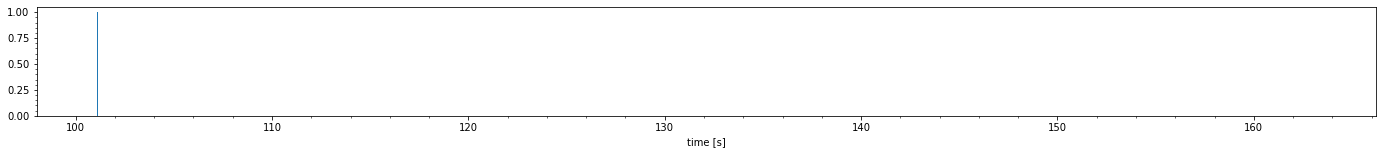

In [25]:
# original
try:
    del image
except Exception:
    pass
image = tiff.imread(pystackreg_examples[1])
clip = image[0].mean()
np.clip(image, clip, None, out=image)
image = image - clip
print('image shape:', image.shape)

score, failure_frames = failure_score(image)
print(f'failures:', sum(failure_frames))
print(f'failure ptg: {score * 100:.2f}%')

plt.figure(figsize=(24, 2))
fps = 9  # frames / time -> time = frames / fps
r = 1 / fps
plt.hist(np.where(failure_frames)[0] * r, bins=image.shape[0])
plt.minorticks_on()
plt.xlabel(r'time [s]')
# plt.xlim(0, image.shape[0] / fps)
plt.show()

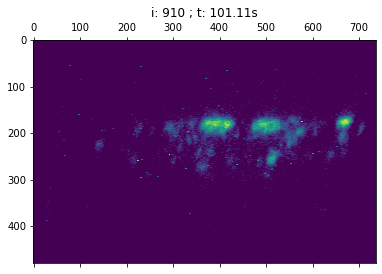

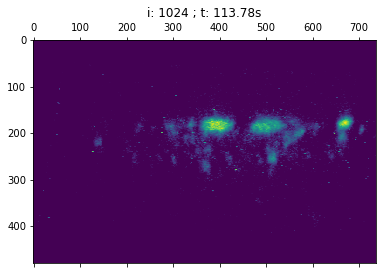

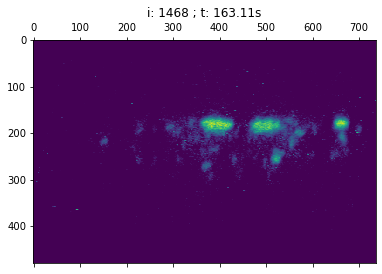

In [26]:
idx = np.where(failure_frames)[0]
for i in idx:
    plt.matshow(image[i])
    plt.title(f'i: {i} ; t: {i / 9:.2f}s')
    plt.show()

In [53]:
import cv2
from modules.metrics import get_centers
def gen(video):
    centers = get_centers(video)
    # consider a frame wrong if the axis is > 10% off the mean
    m_center = centers.mean(axis=0)
    threshold = 0.1 * min(video.shape[1], video.shape[2])
    dists = np.linalg.norm((centers - m_center), 2, axis=1)
    # for cv2
    m_center = m_center.astype(int)[::-1]
    
    circ = cv2.circle(np.zeros((*video[0].shape, 3)), m_center, int(threshold), (255, 0, 0), -1)
    circ_idx = circ > 0

    for i, frame in enumerate(frame_gen(video)):
        frame = cv2.applyColorMap(frame, cv2.COLORMAP_VIRIDIS)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # brightness = 0.15
        # frame = (frame*(1-brightness) + 256*brightness).astype(np.uint8)

        color = (255, 0, 0) if dists[i] > threshold else (255, 255, 255)
        frame = cv2.putText(frame, f'|frame_center - mean_center|_2 = {dists[i] : .2f}',
                            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1,
                            color, 1, cv2.LINE_AA)
        # threshold circle
        alpha = 0.75
        frame[circ_idx] = (1-alpha) * frame[circ_idx] + (alpha) * circ[circ_idx]
        frame = frame.astype(np.uint8)
        # mean center cross
        off = 30
        thickness = 2
        frame = cv2.line(frame, m_center-(off, 0), m_center+(off, 0), (50, 50, 50), thickness)
        frame = cv2.line(frame, m_center-(0, off), m_center+(0, off), (50, 50, 50), thickness)
        # center circle
        c = centers[i].astype(int)[::-1]
        r = 5
        frame = cv2.circle(frame, c, r, (200, 0, 0), -1)
        frame = cv2.circle(frame, c, r, (0, 0, 0), 1)
        yield frame

key_range = range(850, 925)
paths = [pystackreg_examples[1], orig_examples[1], warped_examples[1]]
names = ['pysreg-threshold', 'raw-threshold', 'ofco-threshold']
for saveas, path in zip(names, paths):
    video = tiff.imread(path, key=key_range)

    # pre-processing
    clip = video[0].mean()
    np.clip(video, clip, None, out=video)
    video = video - clip

    make_video(saveas, gen(video), fps=3, cmap=None, output_format='mp4')


calculated std


75it [00:00, 219.64it/s]


converting video..
Done (0.56s)
calculated std


75it [00:00, 215.07it/s]


converting video..
Done (0.59s)
calculated std


75it [00:00, 226.89it/s]


converting video..
Done (0.55s)


In [54]:
Video(names[2] + '.mp4')

--------------------------------
x: 366.52 + 3.98
y: 209.44 + 1.09
failures: 3
failure ptg: 0.07%


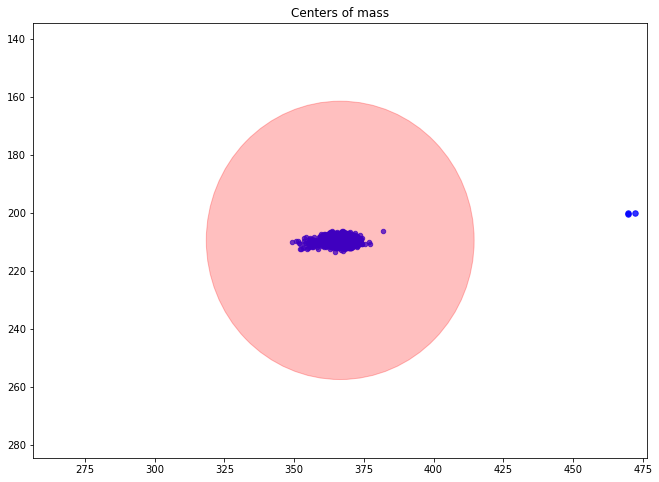

--------------------------------
x: 368.91 + 9.81
y: 214.53 + 5.90
failures: 13
failure ptg: 0.32%


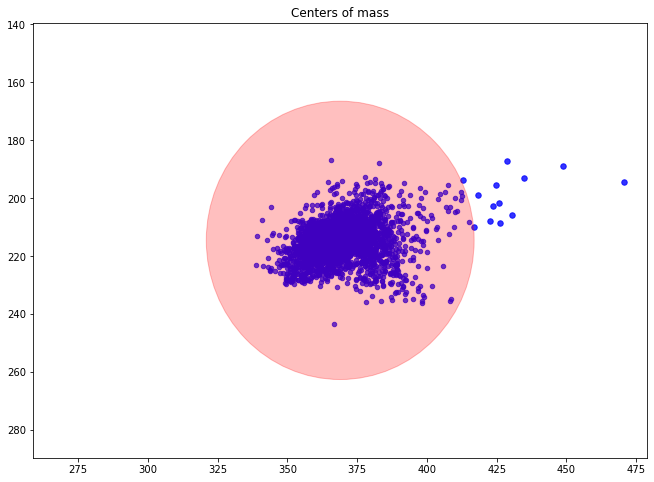

--------------------------------
x: 368.23 + 1.12
y: 202.42 + 0.69
failures: 0
failure ptg: 0.00%


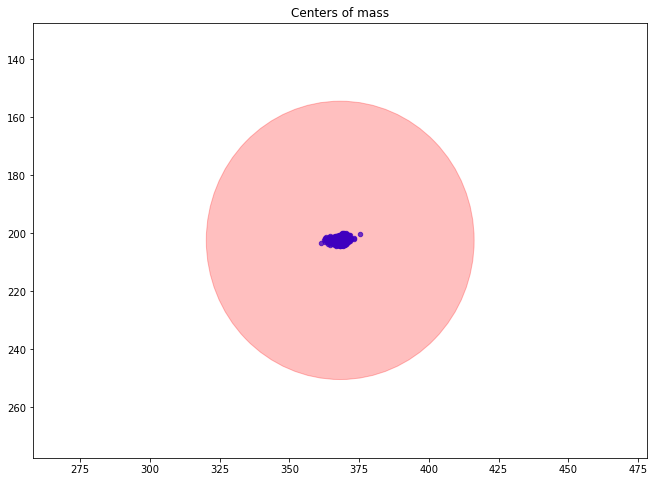

In [25]:
def plot_centers(image, saveas):    
    # calculate centers
    centers = get_centers(image)

    m_centers = centers.mean(axis=0)
    s_centers = centers.std(axis=0)
    print(f'x: {m_centers[0]:.2f} + {s_centers[0]:.2f}')
    print(f'y: {m_centers[1]:.2f} + {s_centers[1]:.2f}')

    score, failures = failure_score(image)
    print('failures:', sum(failures))
    print(f'failure ptg: {score * 100:.2f}%')
    
    radius = 0.1 * min(*image.shape[1:])

    dx = 110
    dy = 75
    ratio = dx / dy
    plt.figure(figsize=(int(8 * ratio), 8))
    ax = plt.subplot(111)
    circ = plt.Circle(m_centers, radius, color='r', alpha=.25)
    ax.add_patch(circ)
    sq_dists = np.sum((centers - m_centers) ** 2, axis=1)
    idx = sq_dists < radius**2
    ax.scatter(centers[~idx, 0], centers[~idx, 1], c='b', s=30, alpha=0.8)
    ax.scatter(centers[idx, 0], centers[idx, 1], c='b', s=20, alpha=0.75)
    # lx, ly = ax.get_xlim()[0], ax.get_ylim()[0]
    # dx = ax.get_xlim()[1] - lx
    # dy = ax.get_ylim()[1] - ly
    # dmax = max(dx, dy)
    ax.set_xlim(m_centers[0] - dx, m_centers[0] + dx)
    ax.set_ylim(m_centers[1] + dy, m_centers[1] - dy)
    plt.title(r'Centers of mass')
    plt.savefig(saveas)
    plt.show()

paths = [pystackreg_examples[1], orig_examples[1], warped_examples[1]]
save_names = ['pysreg-threshold-centers.png', 'raw-threshold-centers.png', 'ofco-threshold-centers.png']
for saveas, path in zip(save_names, paths):
    print('-'*32)
    video = tiff.imread(path)

    # pre-processing
    clip = video[0].mean()
    np.clip(video, clip, None, out=video)
    video = video - clip

    plot_centers(video, saveas)

#### Failure tests summary

In [4]:
from modules.metrics import get_centers, failure_score

In [8]:
from modules.utils import segment_video
from modules.metrics import cont_dice_scores
import time

print('FAILURE SCORES')
print('-'*16)
raw_scores = []
pysreg_scores = []
ofco_scores = []
for i in range(len(orig_examples)):
    t = 0
    scores = []
    for path in [orig_examples[i], warped_examples[i], pystackreg_examples[i]]:
        image = tiff.imread(path)
        
        t1 = time.perf_counter()

        # pre-processing
        clip = int(image[0].mean())
        np.clip(image, clip, None, out=image)
        image = image - clip
        
        score, _ = failure_score(image)
        
        scores += [score]
        t += time.perf_counter() - t1
        
    fps = int(image.shape[0] * 3.0 / t)
    print(f'RAW: {scores[0]:.2g} | PYSREG: {scores[2]:.2g} | OFCO: {scores[1]:.2g} | Calculated {fps} frames each second')
    raw_scores += [scores[0].mean()]
    pysreg_scores += [scores[2].mean()]
    ofco_scores += [scores[1].mean()]  

print(f'RAW:    {np.max(raw_scores):.2g}')
print(f'PYSREG: {np.max(pysreg_scores):.2g}')
print(f'OFCO:   {np.max(ofco_scores):.2g}')

FAILURE SCORES
----------------
RAW: 0 | PYSREG: 0 | OFCO: 0 | Calculated 616 frames each second
RAW: 0.0032 | PYSREG: 0.00073 | OFCO: 0 | Calculated 682 frames each second
RAW: 0.0022 | PYSREG: 0.0022 | OFCO: 0 | Calculated 609 frames each second
RAW: 0.0037 | PYSREG: 0.0015 | OFCO: 0 | Calculated 610 frames each second
RAW: 0.0095 | PYSREG: 0.0088 | OFCO: 0 | Calculated 615 frames each second
RAW:    0.0095
PYSREG: 0.0088
OFCO:   0


In [14]:

print(f'RAW:    {np.mean(raw_scores)*100:.2g} + {np.std(raw_scores)*100:.2g}')
print(f'PYSREG: {np.mean(pysreg_scores)*100:.2g} + {np.std(pysreg_scores)*100:.2g}')
print(f'OFCO:   {np.mean(ofco_scores)*100:.2g} + {np.std(ofco_scores)*100:.2g}')

print(f'RAW:    {np.max(raw_scores)*4100:.4g}')
print(f'PYSREG: {np.max(pysreg_scores)*4100:.4g}')
print(f'OFCO:   {np.max(ofco_scores)*4100:.4g}')

RAW:    0.37 + 0.32
PYSREG: 0.26 + 0.32
OFCO:   0 + 0
RAW:    39
PYSREG: 36
OFCO:   0


#### Failure wrt threshold lineplot

In [58]:
default_threshold = 48 # 0.1 * min(*image.shape[1:])
sq_thresholds = np.linspace(0, 1000, 10000)[np.newaxis, :] ** 2

def calc_failures(image):    
    # calculate centers
    centers = get_centers(image)

    m_centers = centers.mean(axis=0)
    s_centers = centers.std(axis=0)
        
    sq_dists = np.sum((centers - m_centers)**2, axis=1)[:, np.newaxis]
    
    fails = np.sum(sq_dists > sq_thresholds, axis=0) / image.shape[0] * 100
    # plt.plot(np.sqrt(sq_thresholds[0]), fails)
    # plt.bar(default_threshold, 100, color='r')
    # plt.ylabel(r'failure %')
    # plt.xlabel(r'threshold')
    # plt.show()
    return fails

all_fails = []
names = ['RAW', 'PYSREG', 'OFCO']
for paths, name in zip([[orig_examples[1]], [pystackreg_examples[1]], [warped_examples[1]]], names):
    fails = []
    for path in paths:
        print('-'*32)
        print('path:', path)
        image = tiff.imread(path)
        clip = image[0].mean()
        np.clip(image, clip, None, out=image)
        image = image - clip
        print('image shape:', image.shape)

        fails += [calc_failures(image)]
        del image
    all_fails += [np.mean(fails, axis=0)]



--------------------------------
path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.tif
image shape: (4100, 480, 736)
--------------------------------
path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.pystackreg-affine.tif
image shape: (4100, 480, 736)
--------------------------------
path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/warped_red.tif
image shape: (4100, 480, 736)


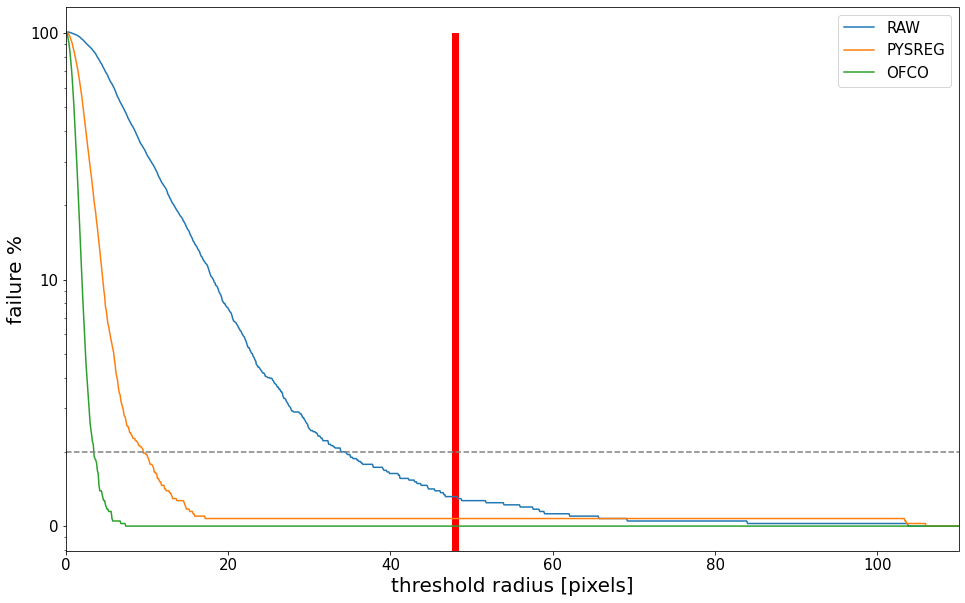

In [61]:

plt.figure(figsize=(16, 10))
plt.yscale('log')
for fails, name in zip(all_fails, names):
    plt.plot(np.sqrt(sq_thresholds[0]), fails+1, label=name)
plt.bar(default_threshold, 100, color='r')
plt.axhline(2, ls='--', color='grey')
plt.legend()
plt.ylabel(r'failure %')
plt.xlabel(r'threshold radius [pixels]')
plt.yticks([1, 10, 100], ['0', '10', '100'])
plt.xlim(0, 110)
plt.show()

### DICE score

In [10]:
from modules.utils import segment_video
from concurrent.futures.thread import ThreadPoolExecutor

def dice_scores(video: np.ndarray) -> float:
    def loop(i):
        X_n_Y = np.sum(video[i] & video[i+1])
        X = np.sum(video[i])
        Y = np.sum(video[i+1])
        return 2 * X_n_Y / (X + Y)

    # use parallelism
    res = []
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(loop, i)
            for i in range(len(video)-1)
        ]
        res = [f.result() for f in futures]
    res = np.array(res)
    return res

In [11]:
import scipy.stats

# load image
try:
    del image
except Exception:
    pass
image = tiff.imread(pystackreg_examples[0], key=range(200))
print('image shape:', image.shape)

image shape: (200, 480, 736)


(200, 480, 736)
23.518560885701994
0.0 9688.775262982506


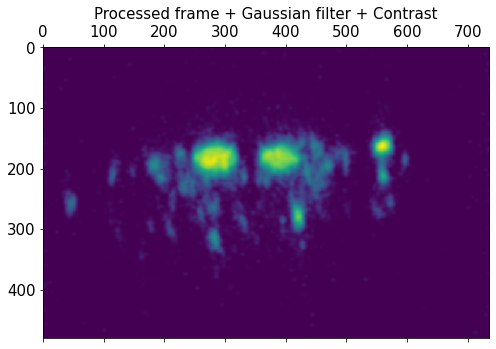

NameError: name 'dice_scores' is not defined

In [51]:
import cv2
import scipy.stats
from modules.utils import segment_video
res = tiff.imread(orig_examples[1], key=range(200))
np.clip(res, 6000, None, out=res)
res = res - 6000
res = segment_video(res, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=False)
print(res.shape)
# make_video('out', frame_gen(res))

x, y = 400, 190
i = 35
print(res[10, x, y])

img = res[i]
print(img.min(), img.max())

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(img)
# ax.plot(x, y,'ro')
plt.title('Processed frame + Gaussian filter + Contrast')
plt.savefig('raw-segment.png')
plt.show()

scores = dice_scores(res)
print(f'dice scores: mean: {scores.mean():.2f} | std: {scores.std():.2f} | min: {scores.min():.2f} | max: {scores.max():.2f}')
plt.figure(figsize=(8, 4))
plt.hist(scores, bins=50)
plt.show()

plt.figure(figsize=(20, 2))
plt.hist(np.where(scores < 0.6)[0], bins=200)
plt.show()


kernel size: 5
Skewness: 2.56
Kurtosis: 7.13
kernel size: 35
Skewness: 3.27
Kurtosis: 12.23
kernel size: 65
Skewness: 3.23
Kurtosis: 11.64
kernel size: 105
Skewness: 2.97
Kurtosis: 9.89
kernel size: 155
Skewness: 2.45
Kurtosis: 6.51


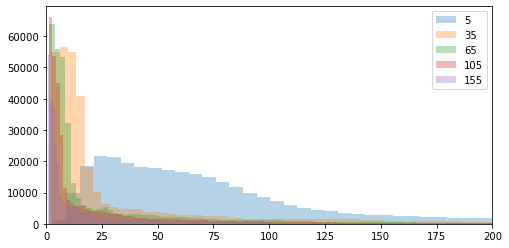

In [65]:
import scipy.stats
from modules.utils import blur_video
plt.figure(figsize=(8, 4))
for k in [5, 35, 65, 105, 155]:
    print('kernel size:', k)
    res = blur_video(image[:200], (k, k))

    # stds
    stds = res.std(axis=0).ravel()
    plt.hist(stds, bins=200, alpha=0.33, label=f'{k}')
    print(f'Skewness: {scipy.stats.skew(stds):.2f}')
    print(f'Kurtosis: {scipy.stats.kurtosis(stds):.2f}')
plt.xlim(0, 200)
plt.legend()
plt.show()

ORIG  - skew: 3.274 kurtosis: 12.029 path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/red.tif
ORIG  - skew: 2.579 kurtosis: 8.233 path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/red.tif
ORIG  - skew: 3.110 kurtosis: 12.066 path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/red.tif
ORIG  - skew: 2.605 kurtosis: 7.816 path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/red.tif
ORIG  - skew: 2.349 kurtosis: 5.881 path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/red.tif


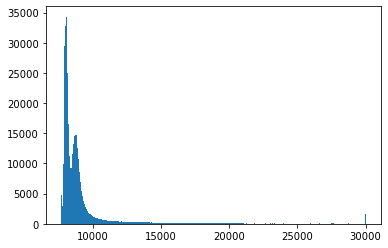

clipped values
WARPED - skew: 3.113 kurtosis: 11.919 path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/warped_red.tif


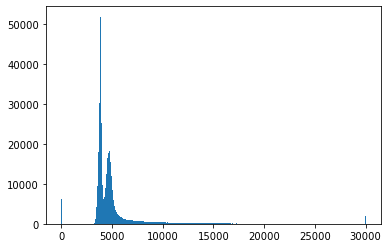

clipped values
WARPED - skew: 2.685 kurtosis: 7.721 path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/warped_red.tif


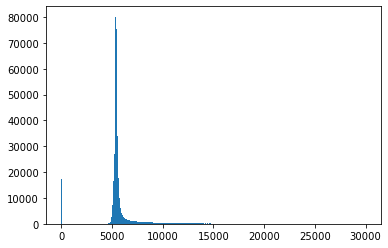

clipped values
WARPED - skew: 2.729 kurtosis: 7.606 path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/warped_red.tif


In [ ]:
import scipy.stats
from modules.utils import blur_video

def get_scores(image, clip=False):
    # blur
    image = blur_video(image, (15, 15), num_reps=10)

    stds = image.std(axis=0).ravel()

    return stds, scipy.stats.skew(stds), scipy.stats.kurtosis(stds)

# check all
stds_array = []
for path in orig_examples:
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    stds, sk, ku = get_scores(image)
    stds_array += [stds]
    print(f'ORIG  - skew: {sk:.3f} kurtosis: {ku:.3f} path: {path:30s}')
for path in warped_examples:
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    np.clip(image, 6000, None, out=image)
    stds, sk, ku = get_scores(image, clip=True)
    del image
    stds_array += [stds]
    print(f'WARPED - skew: {sk:.3f} kurtosis: {ku:.3f} path: {path:30s}')

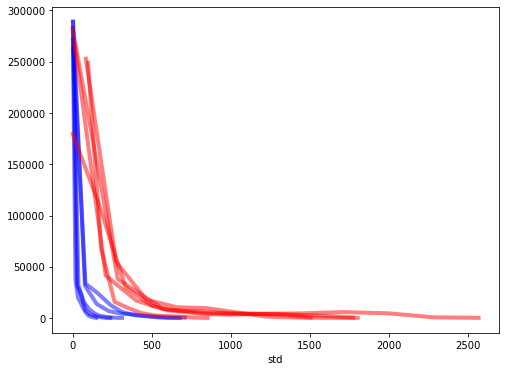

In [9]:
N = len(orig_examples)

plt.figure(figsize=(8, 6))

# ORIGINAL
for stds in stds_array[:N]:
    y, x = np.histogram(stds)
    plt.plot(x[:-1], y, c='b', alpha=.5, lw=4)

# WARPED
for stds in stds_array[N:]:
    y, x = np.histogram(stds)
    plt.plot(x[:-1], y, c='r', alpha=.5, lw=4)
plt.xlabel(r'std')
plt.show()


In [10]:
np.save('stds_array', stds_array)

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/red.tif
0


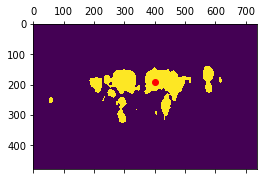

dice scores: mean: 0.83 | std: 0.10 | min: 0.47 | max: 0.91


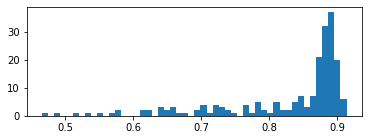

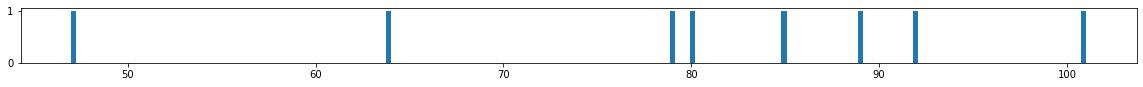

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/red.tif
0


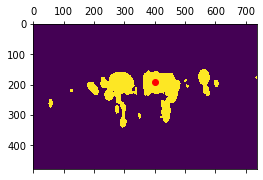

dice scores: mean: 0.70 | std: 0.13 | min: 0.35 | max: 0.91


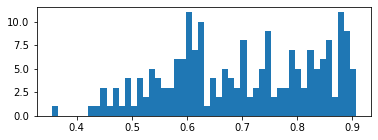

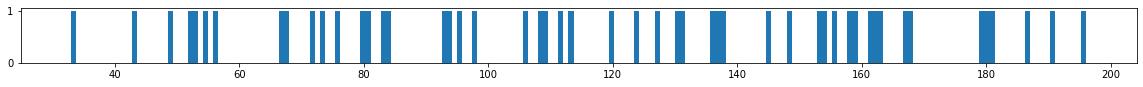

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/red.tif
0


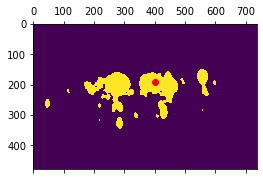

dice scores: mean: 0.87 | std: 0.03 | min: 0.75 | max: 0.90


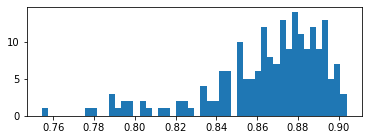

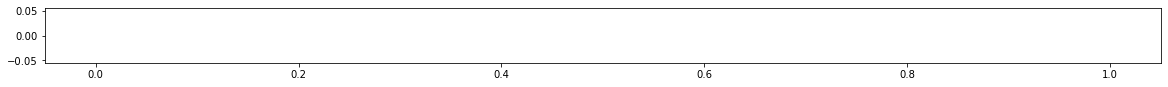

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/red.tif
0


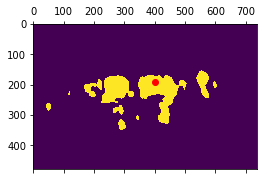

dice scores: mean: 0.87 | std: 0.02 | min: 0.78 | max: 0.91


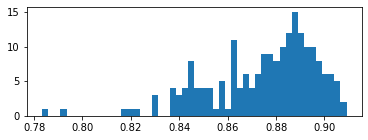

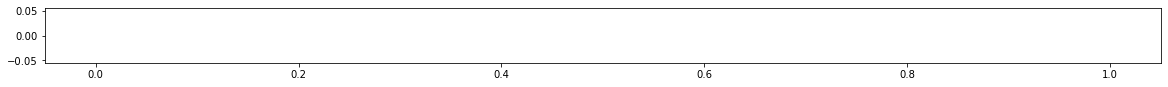

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/red.tif
0


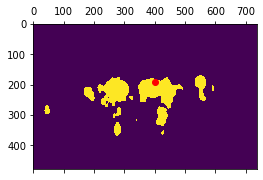

dice scores: mean: 0.88 | std: 0.02 | min: 0.79 | max: 0.91


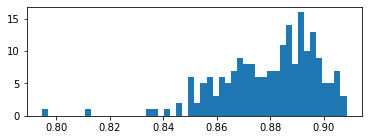

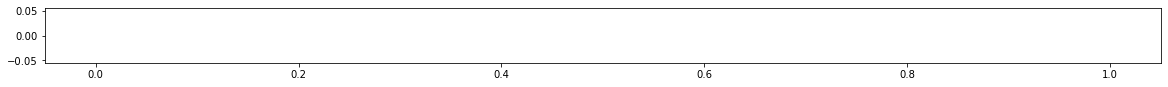

In [34]:
import scipy.stats
from modules.utils import blur_video

def get_scores(image, clip=False):
    res = image
    res = segment_video(res, sigma=1.0, num_reps=15, contrast=2.5)

    x, y = 400, 190
    print(res[10, x, y])

    img = res[10]

    plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    ax.matshow(img)
    ax.plot(x, y, 'ro')
    plt.show()

    scores = dice_scores(res)
    print(f'dice scores: mean: {scores.mean():.2f} | std: {scores.std():.2f} | min: {scores.min():.2f} | max: {scores.max():.2f}')
    plt.figure(figsize=(6, 2))
    plt.hist(scores, bins=50)
    plt.show()

    plt.figure(figsize=(20, 1))
    plt.hist(np.where(scores < 0.6)[0], bins=200)
    plt.show()

    return scores

# check all
scores_array = []
for path in orig_examples:
    print('ORIG   - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    scores = get_scores(image)
    scores_array += [scores]

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/warped_red.tif
0


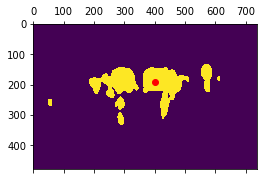

dice scores: mean: 0.94 | std: 0.01 | min: 0.91 | max: 0.95


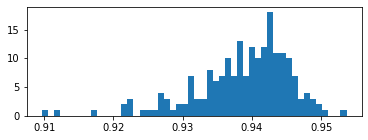

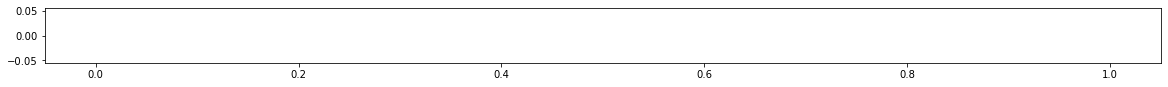

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/warped_red.tif
0


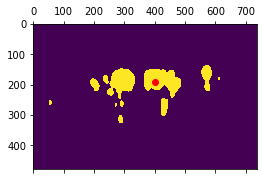

dice scores: mean: 0.94 | std: 0.01 | min: 0.92 | max: 0.96


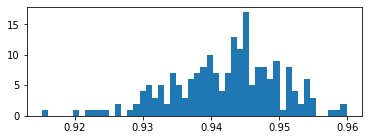

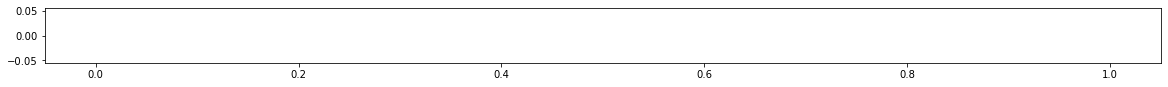

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/warped_red.tif
0


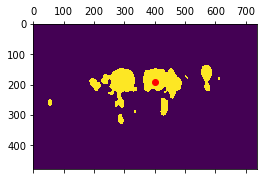

dice scores: mean: 0.93 | std: 0.01 | min: 0.84 | max: 0.95


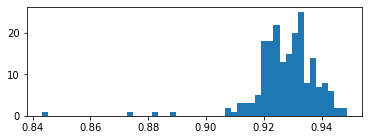

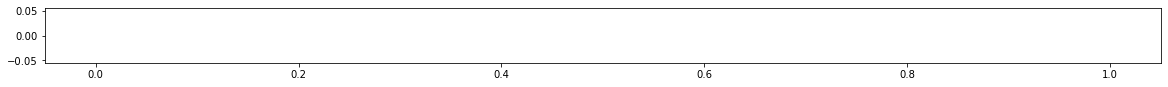

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/warped_red.tif
0


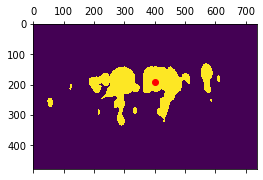

dice scores: mean: 0.94 | std: 0.01 | min: 0.92 | max: 0.96


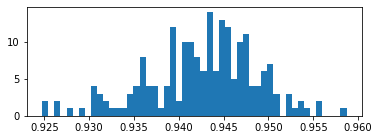

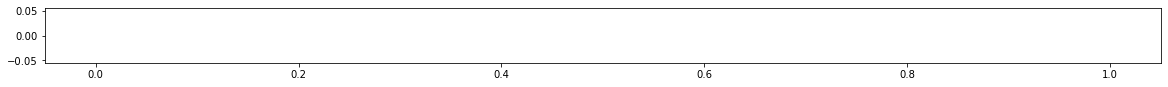

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/warped_red.tif
0


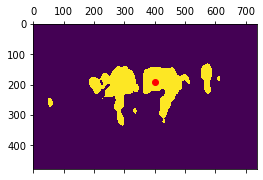

dice scores: mean: 0.95 | std: 0.01 | min: 0.93 | max: 0.96


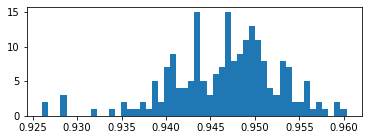

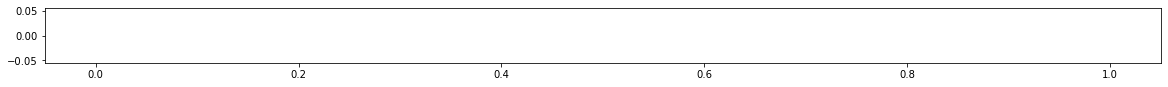

In [29]:
for path in warped_examples:
    print('WARPED - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    np.clip(image, 6000, None, out=image)
    scores = get_scores(image)
    scores_array += [scores]

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/red.pystackreg.tif
0


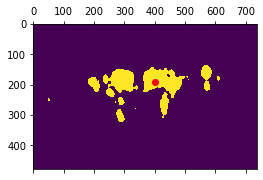

dice scores: mean: 0.87 | std: 0.02 | min: 0.78 | max: 0.91


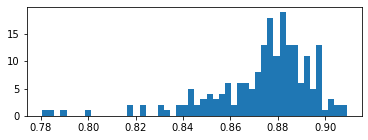

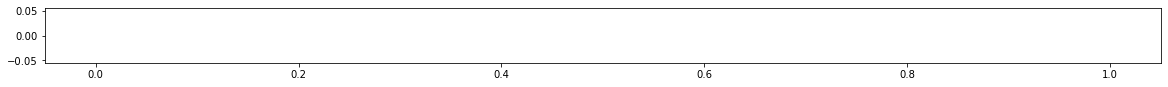

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/red.pystackreg.tif
0


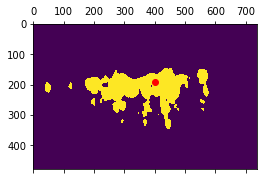

dice scores: mean: 0.85 | std: 0.04 | min: 0.72 | max: 0.92


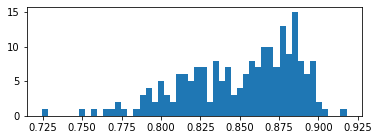

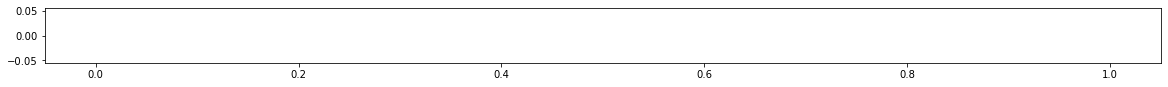

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/red.pystackreg.tif
0


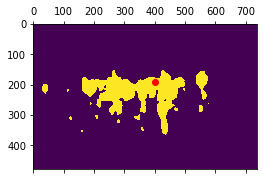

dice scores: mean: 0.87 | std: 0.02 | min: 0.78 | max: 0.91


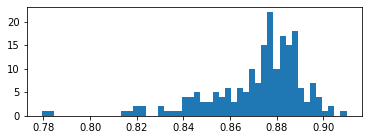

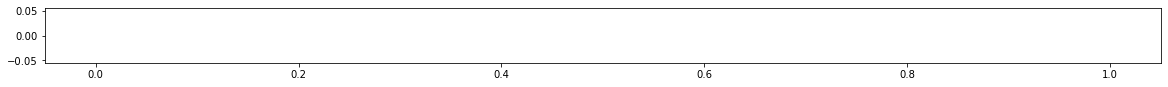

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/red.pystackreg.tif
0


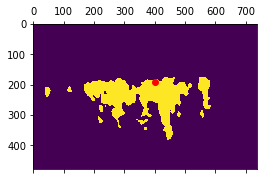

dice scores: mean: 0.87 | std: 0.02 | min: 0.79 | max: 0.90


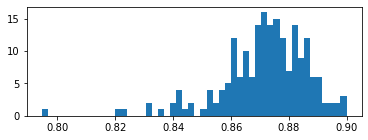

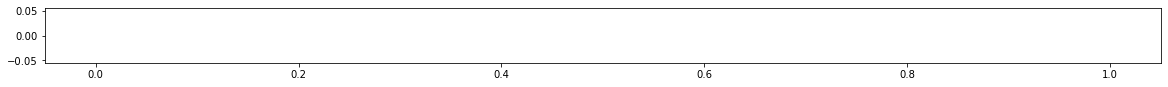

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/red.pystackreg.tif
0


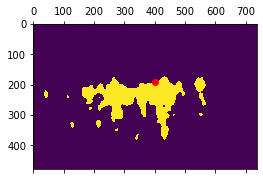

dice scores: mean: 0.87 | std: 0.01 | min: 0.83 | max: 0.90


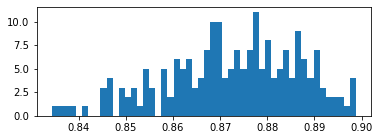

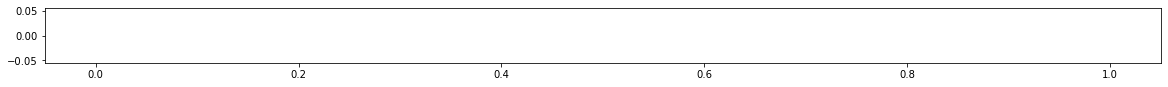

In [30]:
for path in pystackreg_examples:
    print('PYSREG - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    image = image - image.min()
    scores = get_scores(image)
    scores_array += [scores]

In [33]:
video = tiff.imread(orig_examples[0], key=range(200))
np.clip(video, 6000, None, out=video)
video = video - 6000
video = segment_video(video, sigma=1.0, num_reps=15, contrast=2.5, apply_threshold=True)
make_video('raw', frame_gen(video))
del video
Video('raw.mov')

calculated std


200it [00:00, 376.55it/s]


converting video..
Done (0.37s)


In [35]:
video = tiff.imread(warped_examples[0], key=range(200))
np.clip(video, 6000, None, out=video)
video = video - 6000
video = segment_video(video, sigma=1.0, num_reps=15, contrast=2.5)
make_video('optflow', frame_gen(video))
del video
Video('optflow.mov')

calculated std


200it [00:00, 373.46it/s]


converting video..
Done (0.37s)


In [36]:
video = tiff.imread(pystackreg_examples[0], key=range(200))
np.clip(video, 6000, None, out=video)
video = video - 6000
video = segment_video(video, sigma=1.0, num_reps=15, contrast=2.5)
make_video('pystackreg', frame_gen(video))
del video
Video('pystackreg.mov')

calculated std


200it [00:00, 370.24it/s]


converting video..
Done (0.37s)


### Continuous DICE

In [6]:
from modules.utils import segment_video
from concurrent.futures.thread import ThreadPoolExecutor

def cont_dice_scores(video: np.ndarray) -> float:
    normals = np.sum(video ** 2, axis=(1, 2))
    N = normals.max()

    def loop(i):
        # normalization coefficient
        # N = max(normals[i], normals[i+1])

        X_n_Y = np.sum(video[i] * video[i+1]) / N

        return X_n_Y

    # use parallelism
    res = []
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(loop, i)
            for i in range(len(video)-1)
        ]
        res = [f.result() for f in futures]
    res = np.array(res)
    return res

(200, 480, 736)


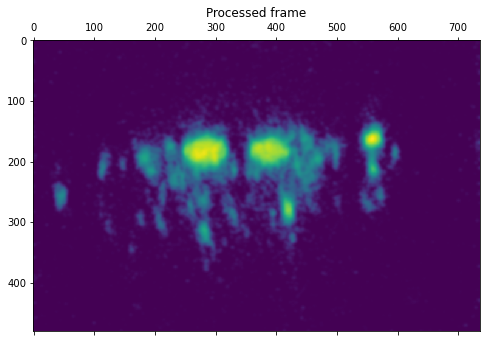

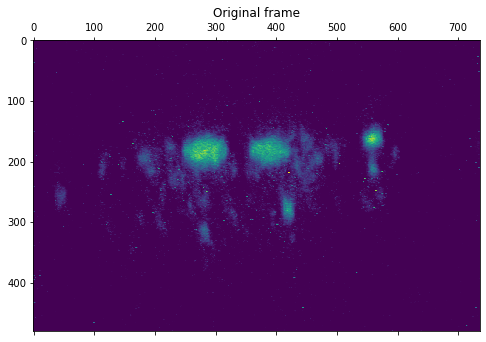

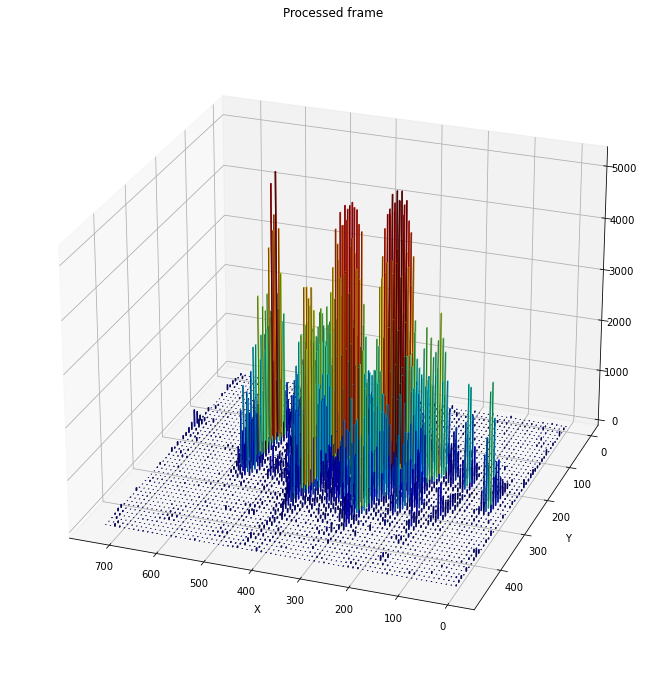

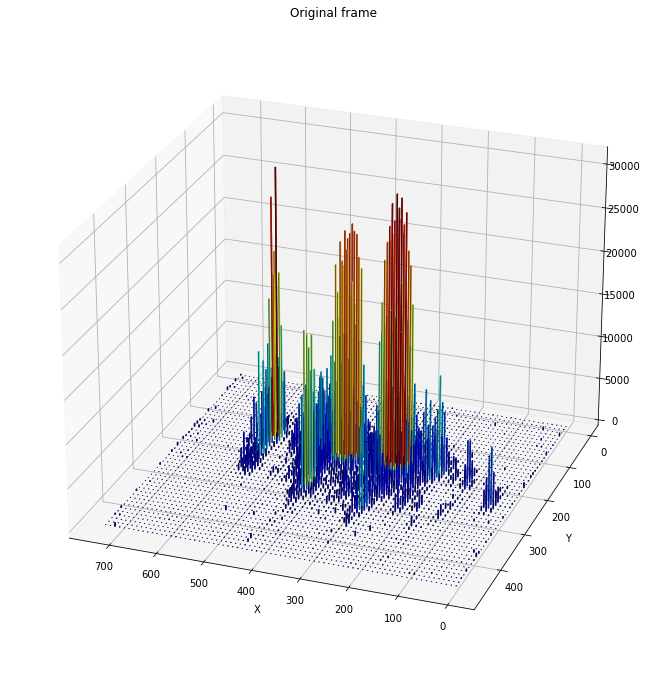

0.9251152301939255


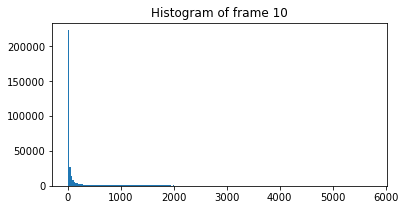

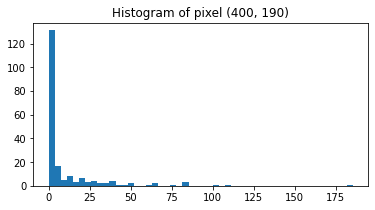

Calculated scores in 0.19s
dice scores: mean: 0.66 | std: 0.08 | min: 0.42 | median: 0.67 | max: 0.82


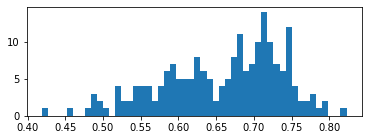

In [109]:
import time
import cv2
import scipy.stats
from modules.utils import segment_video, plot_frame_values_3d
image = tiff.imread(orig_examples[1], key=range(200))

clip = int(image[0].mean())
np.clip(image, clip, None, out=image)
image = image - clip

res = segment_video(image, sigma=1.0, num_reps=5, contrast=2.0, apply_threshold=False)
print(res.shape)
# make_video('out', frame_gen(res))

x, y = 400, 190

i = 35
img = res[i]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(img)
plt.title(r'Processed frame')
plt.savefig(r'processed-frame.svg')
plt.show()

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(image[i])
plt.title(r'Original frame')
plt.savefig(r'orig-frame.svg')
plt.show()

plot_frame_values_3d(img, title=r'Processed frame', saveto=r'processed-frame-bar3d.svg')
plot_frame_values_3d(image[i], title=r'Original frame', saveto=r'orig-frame-bar3d.svg')

# img = res[i+1]

# plt.figure(figsize=(8, 6))
# ax = plt.subplot(111)
# ax.matshow(img)
# ax.plot(x, y, 'ro')
# plt.show()

normals = np.sum(res ** 2, axis=(1, 2))
N = max(normals[i], normals[i+1])
X_n_Y = np.sum(res[i] * res[i+1]) / N
print(X_n_Y)


plt.figure(figsize=(6, 3))
plt.hist(res[10].ravel(), bins=200)
plt.title(r'Histogram of frame 10')
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(res[:, x, y].ravel(), bins=50)
plt.title(f'Histogram of pixel ({x}, {y})')
plt.show()

t1 = time.perf_counter()
scores = cont_dice_scores(res)
t2 = time.perf_counter()
print(f'Calculated scores in {t2-t1:.2f}s')
print(f'dice scores: mean: {scores.mean():.2f} | std: {scores.std():.2f} | min: {scores.min():.2f} | median: {np.median(scores):.2f} | max: {scores.max():.2f}')
plt.figure(figsize=(6, 2))
plt.hist(scores, bins=50)
plt.show()

# plt.figure(figsize=(20, 2))
# plt.hist(np.where(scores < 0.6)[0], bins=200)
# plt.show()


#### Video example

In [56]:
image = tiff.imread(warped_examples[1], key=range(200))

clip = int(image[0].mean())
np.clip(image, clip, None, out=image)
image = image - clip

image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=True)

make_video('ofco-segment-example', frame_gen(image), output_format='mp4')
Video('ofco-segment-example.mp4')

calculated std


200it [00:00, 371.65it/s]


converting video..
Done (0.35s)


In [57]:
image = tiff.imread(pystackreg_examples[1], key=range(200))

clip = int(image[0].mean())
np.clip(image, clip, None, out=image)
image = image - clip

image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=True)

make_video('pysreg-segment-example', frame_gen(image), output_format='mp4')
Video('pysreg-segment-example.mp4')

calculated std


200it [00:00, 370.20it/s]


converting video..
Done (0.37s)


In [18]:
from modules.metrics import get_correlation_scores_prev
get_correlation_scores = get_correlation_scores_prev

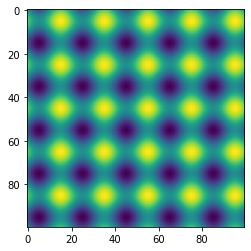

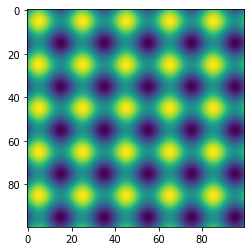

0.8

In [110]:
np.random.seed(1)
sig = np.sin(np.arange(100)/10 * np.pi)[:, np.newaxis]
sig = sig - sig.T

N = 10
eps = 0.0
sig2 = sig + eps * np.random.normal(size=sig.shape)
sig2 = np.c_[sig2[:, -N:], sig2[:, :-N]]
# sig2[:50, :50] = -2

plt.imshow(sig); plt.show()
plt.imshow(sig2); plt.show()

# sig, sig2 = sig.ravel(), sig2.ravel()
get_correlation_scores(np.stack([sig] * 5 + [sig2])).mean()

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/denoised_red.tif
clip: 9251


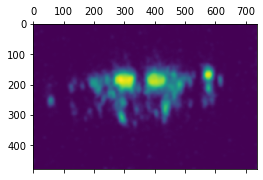

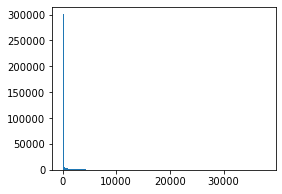

dice scores: mean: 0.81 | std: 0.06 | min: 0.60 | median: 0.81 | max: 0.93


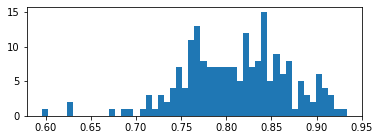

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.tif
clip: 5335


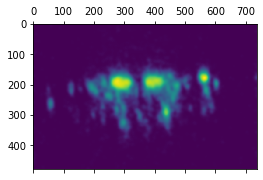

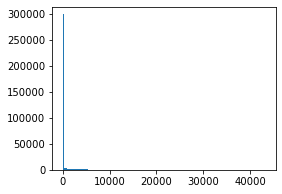

dice scores: mean: 0.68 | std: 0.07 | min: 0.44 | median: 0.69 | max: 0.84


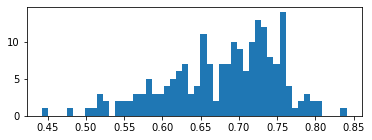

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/denoised_red.tif
clip: 6067


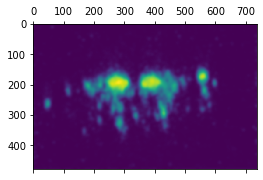

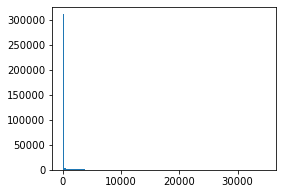

dice scores: mean: 0.77 | std: 0.07 | min: 0.56 | median: 0.78 | max: 0.96


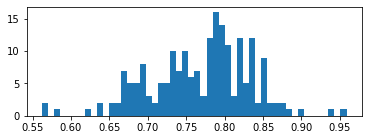

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/denoised_red.tif
clip: 8015


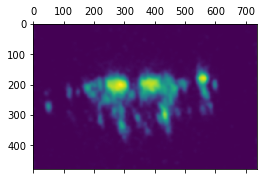

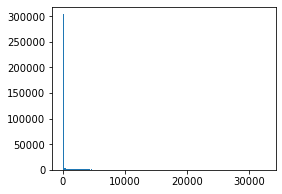

dice scores: mean: 0.84 | std: 0.03 | min: 0.71 | median: 0.83 | max: 0.95


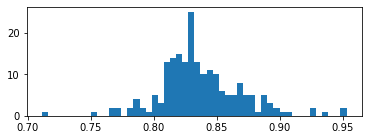

ORIG   - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/denoised_red.tif
clip: 7381


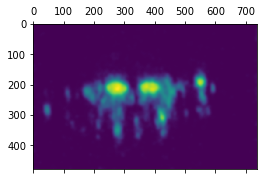

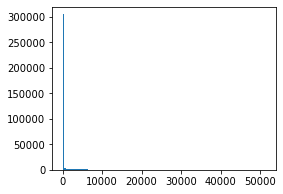

dice scores: mean: 0.75 | std: 0.04 | min: 0.68 | median: 0.76 | max: 0.92


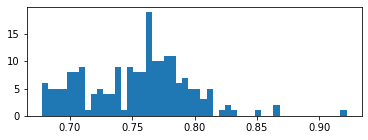

In [77]:
import scipy.stats
from modules.utils import blur_video

def get_scores(image):
    res = image
    res = segment_video(res, sigma=1.0, num_reps=20, contrast=2.0, apply_threshold=False)

    img = res[10]

    plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    ax.matshow(img)
    plt.show()
    
    plt.figure(figsize=(4, 3))
    plt.hist(image[10].ravel(), bins=200)
    plt.show()

    scores = cont_dice_scores(res)
    print(f'dice scores: mean: {scores.mean():.2f} | std: {scores.std():.2f} | min: {scores.min():.2f} | median: {np.median(scores):.2f} | max: {scores.max():.2f}')
    plt.figure(figsize=(6, 2))
    plt.hist(scores, bins=50)
    plt.show()

    # plt.figure(figsize=(20, 1))
    # plt.hist(np.where(scores < 0.6)[0], bins=200)
    # plt.show()

    return scores

# check all
scores_array = []
for path in orig_examples:
    print('ORIG   - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    clip = int(image[0].mean())
    print('clip:', clip)
    np.clip(image, clip, None, out=image)
    image = image - clip
    scores = get_scores(image)
    scores_array += [scores]

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/warped_red.tif
clip: 9222


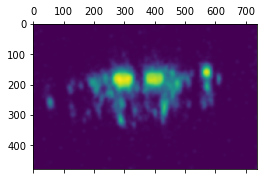

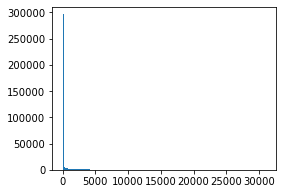

dice scores: mean: 0.85 | std: 0.05 | min: 0.73 | median: 0.85 | max: 0.97


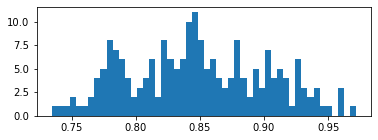

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/warped_red.tif
clip: 5229


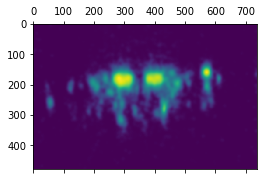

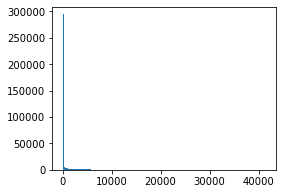

dice scores: mean: 0.80 | std: 0.04 | min: 0.71 | median: 0.80 | max: 0.92


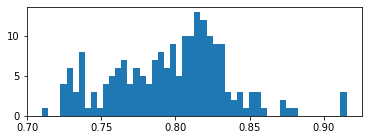

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/warped_red.tif
clip: 5792


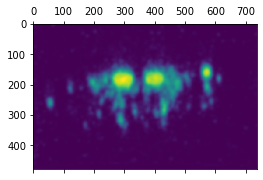

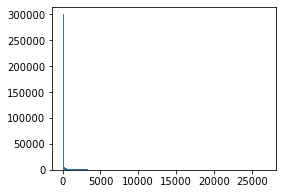

dice scores: mean: 0.80 | std: 0.06 | min: 0.57 | median: 0.81 | max: 0.95


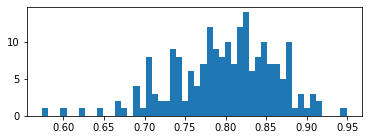

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/warped_red.tif
clip: 7300


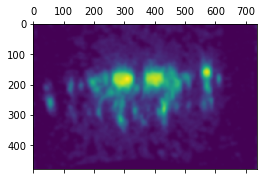

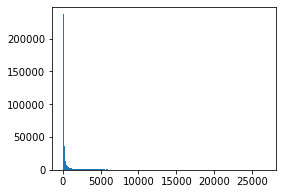

dice scores: mean: 0.91 | std: 0.02 | min: 0.79 | median: 0.91 | max: 0.98


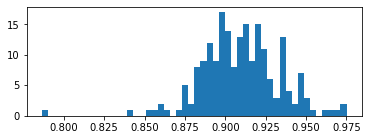

WARPED - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/warped_red.tif
clip: 6891


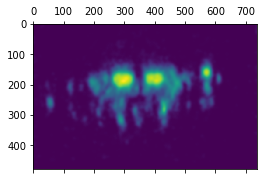

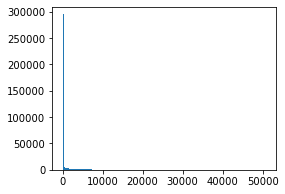

dice scores: mean: 0.82 | std: 0.04 | min: 0.74 | median: 0.82 | max: 0.96


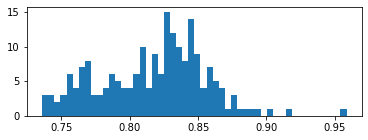

In [64]:
for path in warped_examples:
    print('WARPED - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    clip = int(image[0].mean())
    print('clip:', clip)
    np.clip(image, clip, None, out=image)
    image = image - clip
    scores = get_scores(image)
    scores_array += [scores]

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/denoised_red.pystackreg.tif
clip: 9251.833774550065


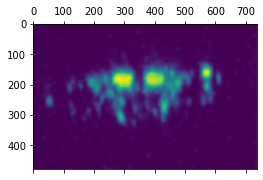

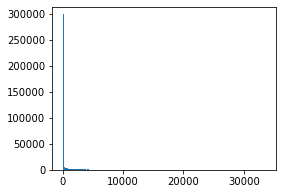

dice scores: mean: 0.84 | std: 0.06 | min: 0.71 | median: 0.84 | max: 0.96


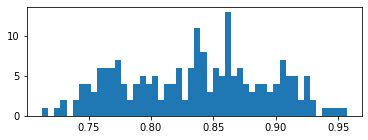

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/002_coronal/2p/denoised_red.pystackreg.tif
clip: 5335.839866489604


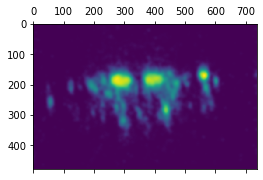

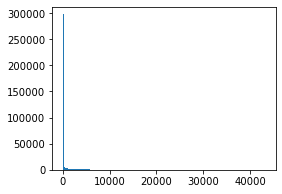

dice scores: mean: 0.76 | std: 0.03 | min: 0.68 | median: 0.76 | max: 0.87


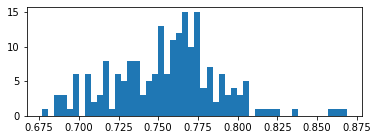

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/003_coronal/2p/denoised_red.pystackreg.tif
clip: 6067.539059753694


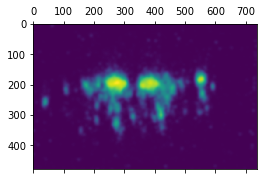

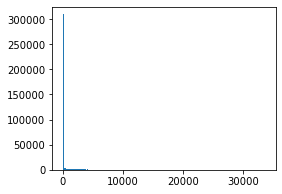

dice scores: mean: 0.77 | std: 0.07 | min: 0.56 | median: 0.78 | max: 0.97


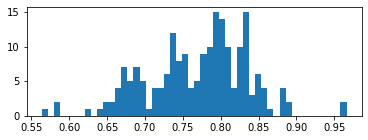

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/004_coronal/2p/denoised_red.pystackreg.tif
clip: 8015.144153881764


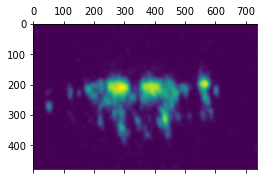

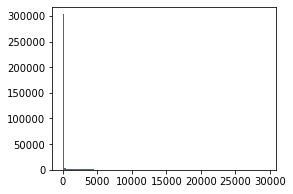

dice scores: mean: 0.84 | std: 0.03 | min: 0.72 | median: 0.83 | max: 0.98


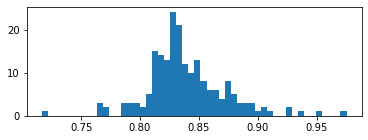

PYSREG - path: ../data/200901_G23xU1/Fly1/Fly1/005_coronal/2p/denoised_red.pystackreg.tif
clip: 7381.153685810946


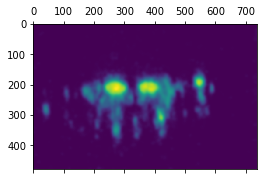

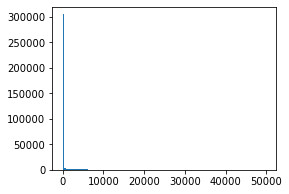

dice scores: mean: 0.76 | std: 0.04 | min: 0.68 | median: 0.76 | max: 0.94


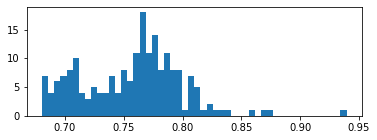

In [60]:
for path in pystackreg_examples:
    print('PYSREG - path:', path)
    # limit ourselves to the first 200 frames
    image = tiff.imread(path, key=range(200))
    clip = int(image[0].mean())
    print('clip:', clip)
    np.clip(image, clip, None, out=image)
    image = image - clip
    scores = get_scores(image)
    scores_array += [scores]

clip: 1617.4947903061761


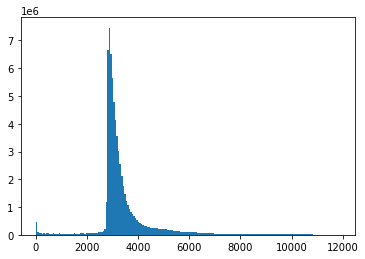

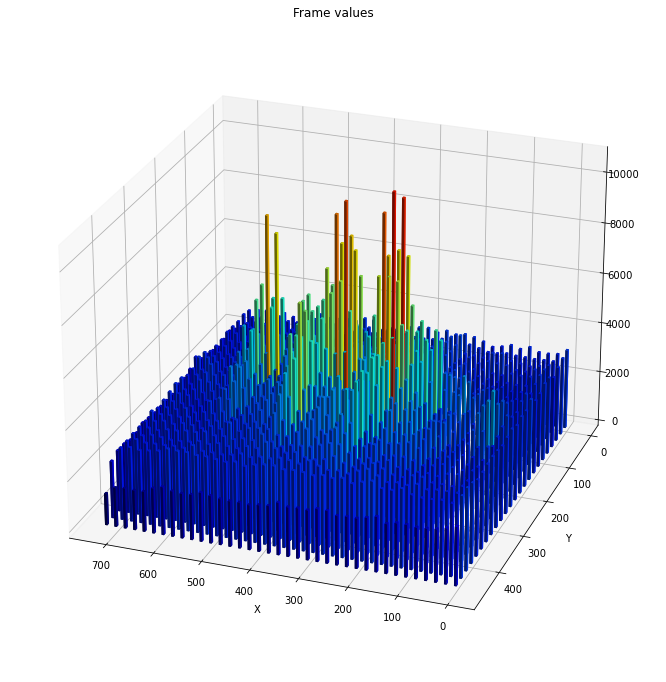

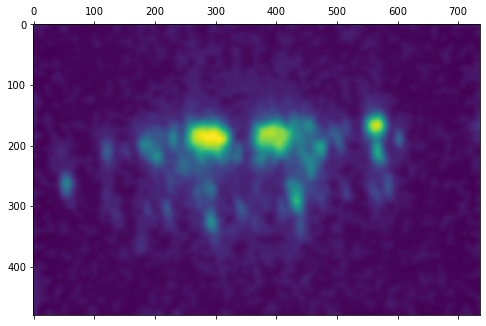

In [66]:
from modules.utils import segment_video, plot_frame_values_3d
path = pystackreg_examples[1]
image = tiff.imread(path, key=range(200))
clip = image[0].mean() - image[0].std()
print('clip:', clip)
np.clip(image, clip, None, out=image)
image = image - clip

image = segment_video(image, sigma=1.0, num_reps=20, contrast=2.0, apply_threshold=False)

plt.hist(image.ravel(), bins=200)
plt.show()

plot_frame_values_3d(image[10], pool=20, size=5)

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(image[0])
plt.show()

# path = warped_examples[2]
# image = tiff.imread(path, key=range(200))
# plt.hist(image.ravel(), bins=200)
# plt.show()
# make_video('out',  frame_gen(image))
# Video('out.mov')

clip: 5335.839866489604


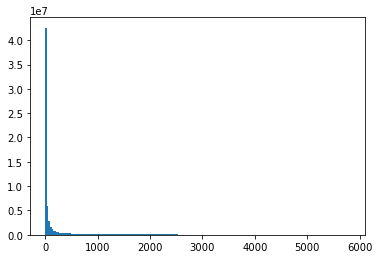

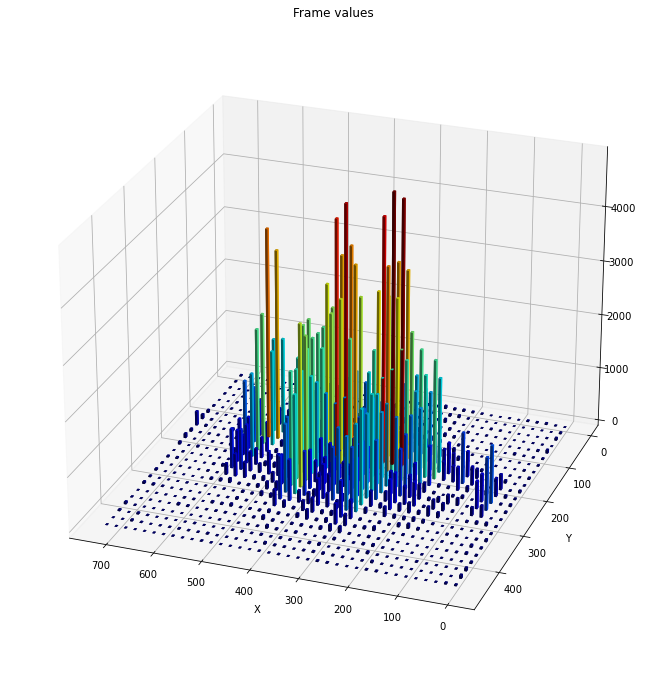

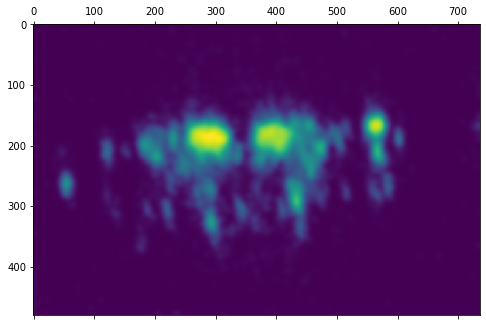

In [56]:
from modules.utils import segment_video, plot_frame_values_3d
path = pystackreg_examples[1]
image = tiff.imread(path, key=range(200))
clip = image[0].mean()
print('clip:', clip)
np.clip(image, clip, None, out=image)
image = image - clip

image = segment_video(image, sigma=1.0, num_reps=20, contrast=2.0, apply_threshold=False)

plt.hist(image.ravel(), bins=200)
plt.show()

plot_frame_values_3d(image[10], pool=20, size=5)

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.matshow(image[0])
plt.show()

# path = warped_examples[2]
# image = tiff.imread(path, key=range(200))
# plt.hist(image.ravel(), bins=200)
# plt.show()
# make_video('out',  frame_gen(image))
# Video('out.mov')

#### All tests summary

In [34]:
import time

print('CONT DICE SCORES')
print('-'*16)
raw_scores = []
pysreg_scores = []
ofco_scores = []
for i in range(len(orig_examples)):
    t = 0
    scores = []
    for path in [orig_examples[i], warped_examples[i], pystackreg_examples[i]]:
        image = tiff.imread(path)
        
        t1 = time.perf_counter()

        # pre-processing
        clip = int(image[0].mean())
        np.clip(image, clip, None, out=image)
        image = image - clip
        image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=False)

        scores += [cont_dice_scores(image)]
        t += time.perf_counter() - t1
        
    fps = int(image.shape[0] * 3.0 / t)
    print(f'RAW: {scores[0].mean():.2f} | PYSREG: {scores[2].mean():.2f} | OFCO: {scores[1].mean():.2f} | Calculated {fps} frames each second')
    raw_scores += [scores[0].mean()]
    pysreg_scores += [scores[2].mean()]
    ofco_scores += [scores[1].mean()]  

print(f'RAW:    {np.mean(raw_scores):.2f} ± {np.std(raw_scores):.2f}')
print(f'PYSREG: {np.mean(pysreg_scores):.2f} ± {np.std(pysreg_scores):.2f}')
print(f'OFCO:   {np.mean(ofco_scores):.2f} ± {np.std(ofco_scores):.2f}')

CONT DICE SCORES
----------------
RAW: 0.71 | PYSREG: 0.82 | OFCO: 0.81 | Calculated 1055 frames each second
RAW: 0.59 | PYSREG: 0.73 | OFCO: 0.68 | Calculated 1065 frames each second
RAW: 0.69 | PYSREG: 0.80 | OFCO: 0.76 | Calculated 1009 frames each second
RAW: 0.71 | PYSREG: 0.82 | OFCO: 0.78 | Calculated 946 frames each second
RAW: 0.68 | PYSREG: 0.78 | OFCO: 0.74 | Calculated 964 frames each second
RAW:    0.67 ± 0.04
PYSREG: 0.79 ± 0.03
OFCO:   0.75 ± 0.04


In [5]:
from modules.utils import segment_video
from modules.metrics import cont_dice_scores
import time

print('DISCRETE DICE SCORES')
print('-'*16)
raw_scores = []
pysreg_scores = []
ofco_scores = []
for i in range(len(orig_examples)):
    t = 0
    scores = []
    for path in [orig_examples[i], warped_examples[i], pystackreg_examples[i]]:
        image = tiff.imread(path)
        
        t1 = time.perf_counter()

        # pre-processing
        clip = int(image[0].mean())
        np.clip(image, clip, None, out=image)
        image = image - clip
        image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=True)

        scores += [cont_dice_scores(image)]
        t += time.perf_counter() - t1
        
    fps = int(image.shape[0] * 3.0 / t)
    print(f'RAW: {scores[0].mean():.2f} | PYSREG: {scores[2].mean():.2f} | OFCO: {scores[1].mean():.2f} | Calculated {fps} frames each second')
    raw_scores += [scores[0].mean()]
    pysreg_scores += [scores[2].mean()]
    ofco_scores += [scores[1].mean()]  

print(f'RAW:    {np.mean(raw_scores):.2f} ± {np.std(raw_scores):.2f}')
print(f'PYSREG: {np.mean(pysreg_scores):.2f} ± {np.std(pysreg_scores):.2f}')
print(f'OFCO:   {np.mean(ofco_scores):.2f} ± {np.std(ofco_scores):.2f}')

DISCRETE DICE SCORES
----------------
RAW: 0.65 | PYSREG: 0.75 | OFCO: 0.78 | Calculated 202 frames each second
RAW: 0.61 | PYSREG: 0.71 | OFCO: 0.76 | Calculated 216 frames each second
RAW: 0.71 | PYSREG: 0.75 | OFCO: 0.79 | Calculated 206 frames each second
RAW: 0.76 | PYSREG: 0.79 | OFCO: 0.84 | Calculated 203 frames each second
RAW: 0.68 | PYSREG: 0.71 | OFCO: 0.78 | Calculated 204 frames each second
RAW:    0.68 ± 0.05
PYSREG: 0.74 ± 0.03
OFCO:   0.79 ± 0.03


#### Frame to frame correlation image

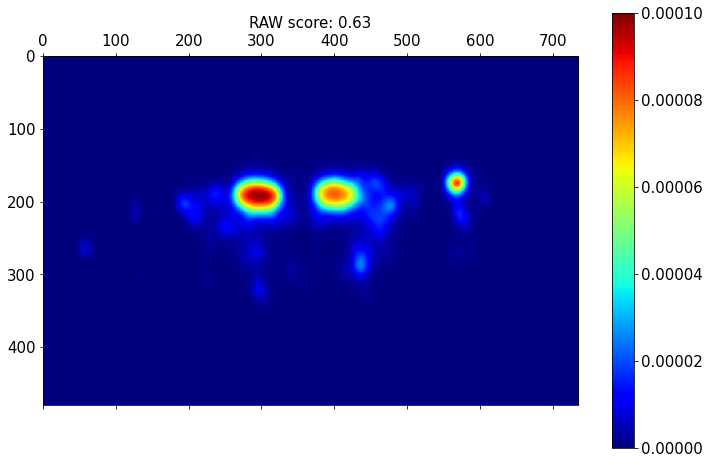

sum: 0.6311454453126228


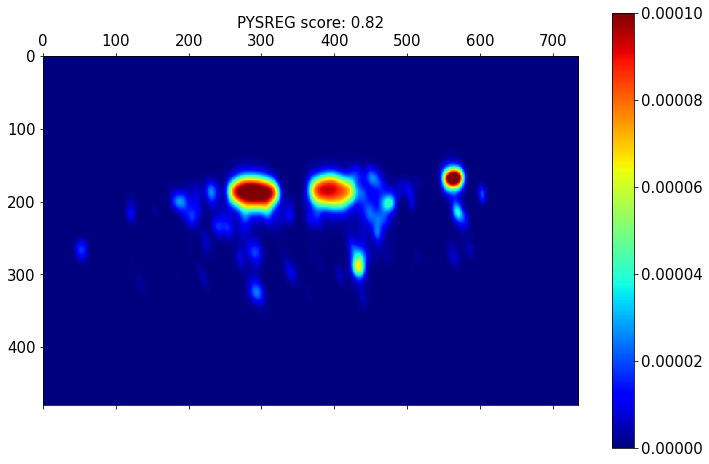

sum: 0.8164029414022818


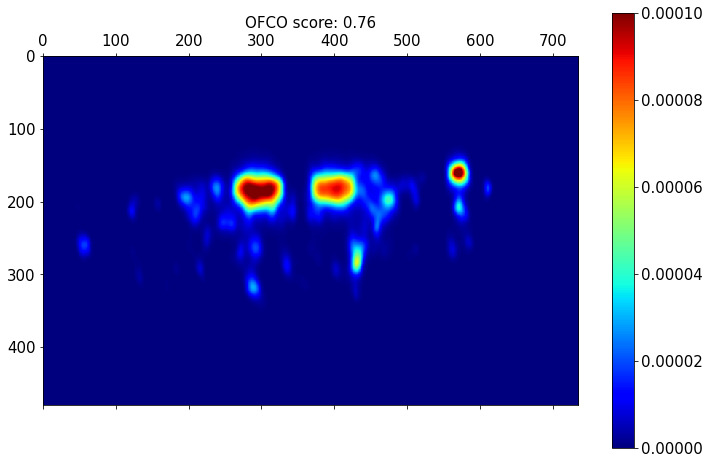

sum: 0.7634073331395417


In [46]:
from concurrent.futures.thread import ThreadPoolExecutor
from modules.utils import segment_video, plot_frame_values_3d
from modules.metrics import cont_dice_scores

for path, title in zip([orig_examples[1], pystackreg_examples[1], warped_examples[1]], ['RAW', 'PYSREG', 'OFCO']):
    image = tiff.imread(path, key=range(1000))
    # pre-processing
    clip = int(image[0].mean())
    np.clip(image, clip, None, out=image)
    image = image - clip
    image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=False)

    normals = np.sum(image ** 2, axis=(1, 2))
    N = normals.max()

    def loop(i):
        return image[i] * image[i+1] / N

    # use parallelism
    res = []
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(loop, i)
            for i in range(len(image)-1)
        ]
        res = [f.result() for f in futures]
    res = np.mean(res, axis=0)
    
    score = cont_dice_scores(image).mean()

    plt.figure(figsize=(12, 8))
    ax = plt.subplot(111)
    sh = ax.matshow(res, cmap='jet', vmin=0, vmax=1e-4)
    plt.colorbar(sh)
    plt.title(title + f' score: {score:.2f}')
    plt.savefig(f'{title.lower()}-dice-mean.png')
    plt.show()
    print('sum:', np.sum(res))

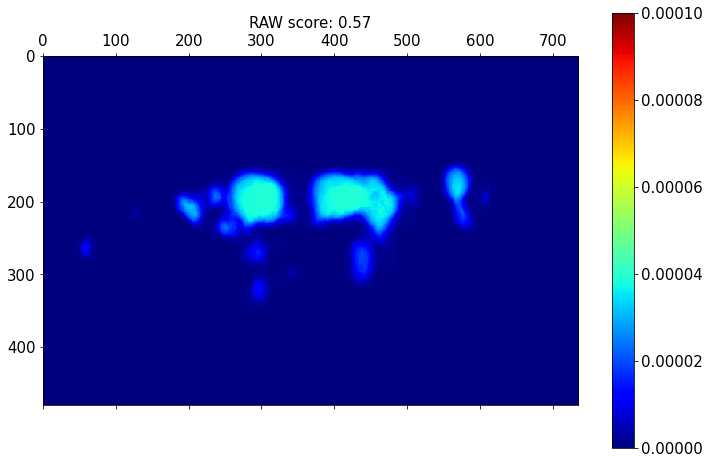

sum: 0.5721384591524565


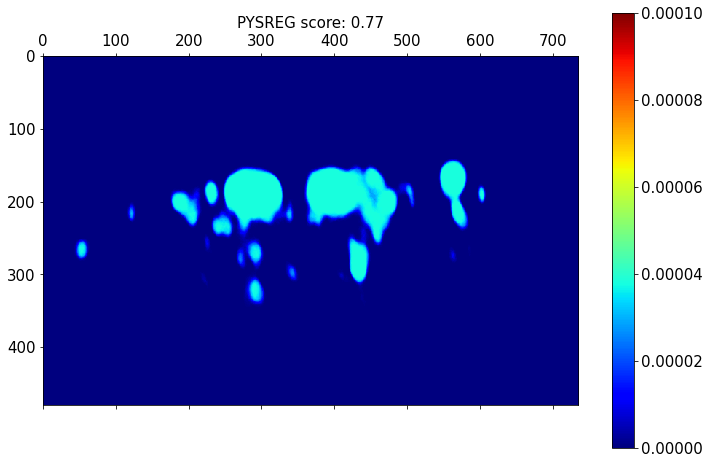

sum: 0.7684830456071028


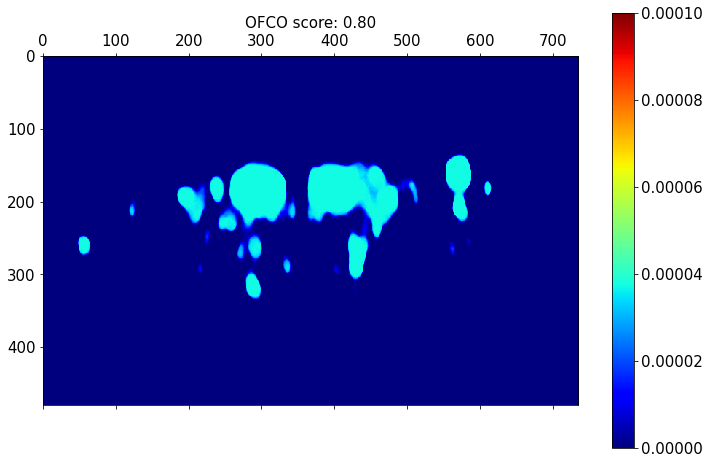

sum: 0.8008240644040353


In [53]:
from concurrent.futures.thread import ThreadPoolExecutor
from modules.utils import segment_video, plot_frame_values_3d
from modules.metrics import cont_dice_scores

for path, title in zip([orig_examples[1], pystackreg_examples[1], warped_examples[1]], ['RAW', 'PYSREG', 'OFCO']):
    image = tiff.imread(path, key=range(200))
    # pre-processing
    clip = int(image[0].mean())
    np.clip(image, clip, None, out=image)
    image = image - clip
    image = segment_video(image, sigma=1.0, num_reps=5, contrast=1.5, apply_threshold=True)

    normals = np.sum(image ** 2, axis=(1, 2))
    N = normals.max()

    def loop(i):
        return image[i] * image[i+1] / N

    # use parallelism
    res = []
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(loop, i)
            for i in range(len(image)-1)
        ]
        res = [f.result() for f in futures]
    res = np.mean(res, axis=0)
    
    score = cont_dice_scores(image).mean()

    plt.figure(figsize=(12, 8))
    ax = plt.subplot(111)
    sh = ax.matshow(res, cmap='jet', vmin=0, vmax=1e-4)
    plt.colorbar(sh)
    plt.title(title + f' score: {score:.2f}')
    plt.savefig(f'{title.lower()}-dice-segment-mean.png')
    plt.show()
    print('sum:', np.sum(res))

### KL divergence

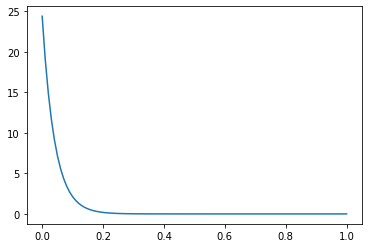

In [44]:
l = 1 / 0.041
x = np.linspace(0, 1, 100)
pdf = l * np.exp(-l * x)
plt.plot(x, pdf)
plt.show()

image shape: (4100, 480, 736)


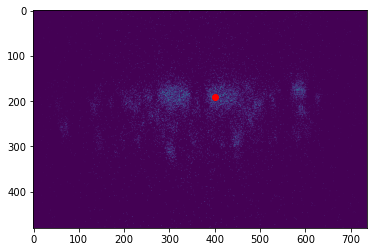

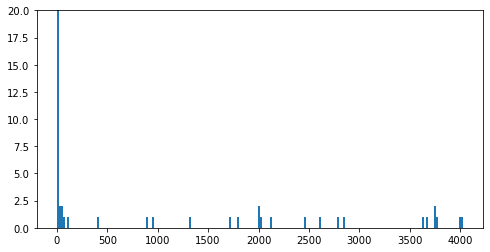

In [19]:
# original
try:
    del image
except Exception:
    pass
image = tiff.imread('../data/200901_G23xU1/Fly1/Fly1/001_coronal/2p/red.tif')
print('image shape:', image.shape)

x, y = 400, 190
plt.imshow(image[100])
plt.plot(x, y, 'ro')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(image[:, x, y], bins=200)
plt.ylim(0, 20)
plt.show()

In [20]:
image[100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

### MSE

This metric is most appropiate when checking if a frame is simply the ground truth + some gaussian noise

In [33]:
from modules.metrics import MSE_score

In [25]:
# original
try:
    del image
except Exception:
    pass
image = tiff.imread(warped_examples[1], key=range(100))
clip = image[0].mean()
np.clip(image, clip, None, out=image)
image = image - clip

t1 = time.perf_counter()
score = MSE_score(image)
t2 = time.perf_counter()
print(f'score: {score:.3g} | elapsed: {t2-t1:.2f}s')

print('image shape:', image.shape)

K: 11195509.809354251
score: 0.0917 | elapsed: 0.21s
image shape: (100, 480, 736)


note that the noise is NOT Gaussian

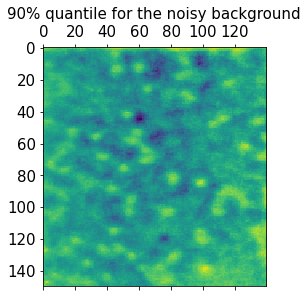

min val: 0 max val: 28893


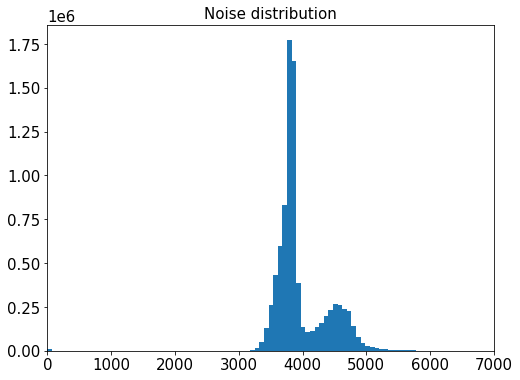

In [23]:
b = image[:, :150, 10:150]
a = np.quantile(b, 0.9, axis=0)
plt.matshow(a)
plt.title(r'90% quantile for the noisy background')
plt.show()

print('min val:', b.min(), 'max val:', b.max())
plt.figure(figsize=(8,6))
plt.hist(b.ravel(), bins=400)
plt.xlim(0, 7000)
plt.title(r'Noise distribution')
plt.show()

#### All tests summary


```
MSE SCORES
----------------
RAW: 3,207,017 | PYSREG: 2,913,308 | OFCO: 2,026,966 | Calculated 374 frames each second
RAW: 4,565,059 | PYSREG: 2,436,148 | OFCO: 1,575,710 | Calculated 472 frames each second
RAW: 2,614,478 | PYSREG: 2,219,170 | OFCO: 1,485,824 | Calculated 463 frames each second
RAW: 2,239,631 | PYSREG: 1,949,492 | OFCO: 1,718,479 | Calculated 509 frames each second
RAW: 4,727,757 | PYSREG: 3,511,833 | OFCO: 2,121,763 | Calculated 633 frames each second
RAW:    3,470,788.28 ± 1,009,553.49
PYSREG: 2,605,990.33 ± 552,170.34
OFCO:   1,785,748.56 ± 248,872.57
```

In [9]:
from modules.metrics import MSE_score
import time

print('MSE SCORES')
print('-'*16)
raw_scores = []
pysreg_scores = []
ofco_scores = []
for i in range(len(orig_examples)):
    t = 0
    scores = []
    for path in [orig_examples[i], warped_examples[i], pystackreg_examples[i]]:
        image = tiff.imread(path)
        
        t1 = time.perf_counter()

        # pre-processing
        image = image - image.mean()

        scores += [MSE_score(image)]
        t += time.perf_counter() - t1
        
    fps = int(image.shape[0] * 3.0 / t)
    print(f'RAW: {scores[0]:,.0f} | PYSREG: {scores[2]:,.0f} | OFCO: {scores[1]:,.0f} | Calculated {fps} frames each second')
    raw_scores += [scores[0]]
    pysreg_scores += [scores[2]]
    ofco_scores += [scores[1]]  

print(f'RAW:    {np.mean(raw_scores):,.2f} ± {np.std(raw_scores):,.2f}')
print(f'PYSREG: {np.mean(pysreg_scores):,.2f} ± {np.std(pysreg_scores):,.2f}')
print(f'OFCO:   {np.mean(ofco_scores):,.2f} ± {np.std(ofco_scores):,.2f}')

MSE SCORES
----------------
RAW: 3,207,017 | PYSREG: 2,913,308 | OFCO: 2,026,966 | Calculated 374 frames each second
RAW: 4,565,059 | PYSREG: 2,436,148 | OFCO: 1,575,710 | Calculated 472 frames each second
RAW: 2,614,478 | PYSREG: 2,219,170 | OFCO: 1,485,824 | Calculated 463 frames each second
RAW: 2,239,631 | PYSREG: 1,949,492 | OFCO: 1,718,479 | Calculated 509 frames each second
RAW: 4,727,757 | PYSREG: 3,511,833 | OFCO: 2,121,763 | Calculated 633 frames each second
RAW:    3,470,788.28 ± 1,009,553.49
PYSREG: 2,605,990.33 ± 552,170.34
OFCO:   1,785,748.56 ± 248,872.57


100%|████████████████████████████████████| 11/11 [00:04<00:00,  2.69it/s]


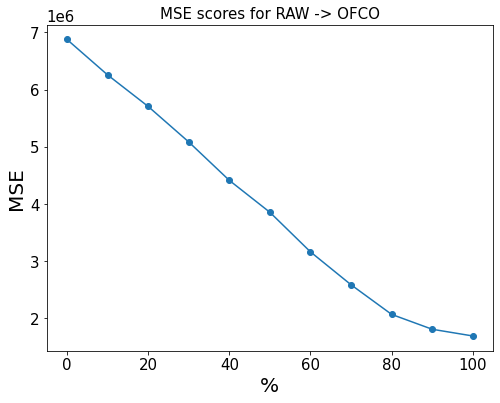

100%|████████████████████████████████████| 11/11 [00:04<00:00,  2.31it/s]


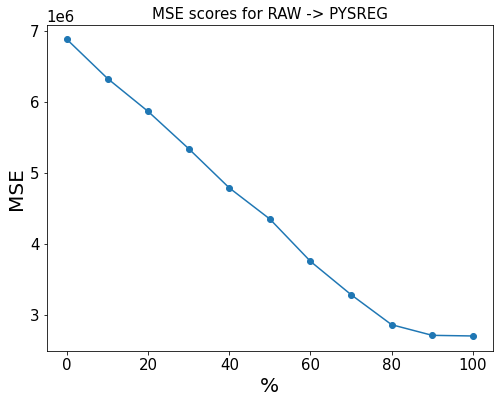

100%|████████████████████████████████████| 11/11 [00:04<00:00,  2.29it/s]


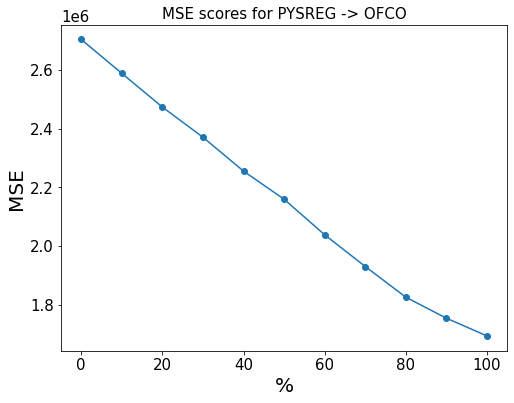

In [32]:
from tqdm import tqdm
N = 200

for path1, path2, name1, name2 in \
    zip([orig_examples[1], orig_examples[1], pystackreg_examples[1]],
        [warped_examples[1], pystackreg_examples[1], warped_examples[1]],
        ['RAW', 'RAW', 'PYSREG'],
        ['OFCO', 'PYSREG', 'OFCO']):
    image1 = tiff.imread(path1, key=range(N))
    image2 = tiff.imread(path2, key=range(N))

    scores = []
    ran = np.arange(0, N+1, N//10)
    for i in tqdm(ran):
        image = np.concatenate([image1[:N-i], image2[:i]])
        image = image - image.mean(axis=0)
        score = MSE_score(image)
        scores += [score]

    plt.figure(figsize=(8, 6))
    plt.plot(ran / N * 100, scores, '-o')
    plt.title(f'MSE scores for {name1} -> {name2}')
    plt.xlabel(r'%')
    plt.ylabel(r'MSE')
    plt.show()

### Patch-wise NCC

In [47]:
from concurrent.futures.thread import ThreadPoolExecutor

def patch_ncc(video: np.ndarray) -> float:
    means = np.mean(video, axis=(1, 2))
    stds = np.std(video, axis=(1, 2))
    median = np.median(video, axis=0)
    ref = median - median.mean()
    ref_std = ref.std()

    def loop(i):
        inner = np.sum(ref * (video[i] - means[i]))
        return inner / (ref_std * stds[i])

    # use parallelism
    res = []
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(loop, i)
            for i in range(len(video))
        ]
        res = [f.result() for f in futures]
    return np.mean(res)

100%|████████████████████████████████████| 11/11 [00:16<00:00,  1.50s/it]


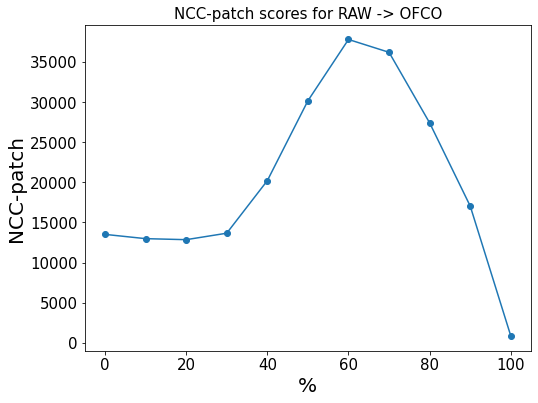

100%|████████████████████████████████████| 11/11 [00:17<00:00,  1.57s/it]


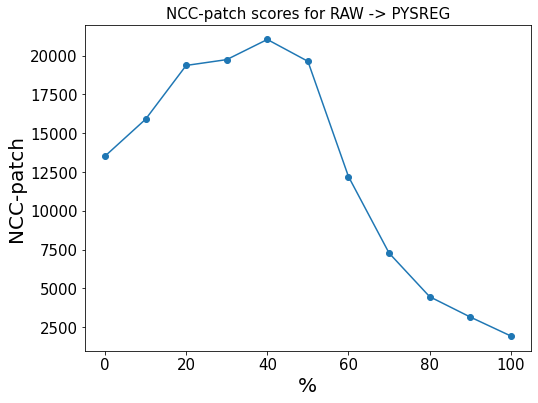

100%|████████████████████████████████████| 11/11 [00:17<00:00,  1.55s/it]


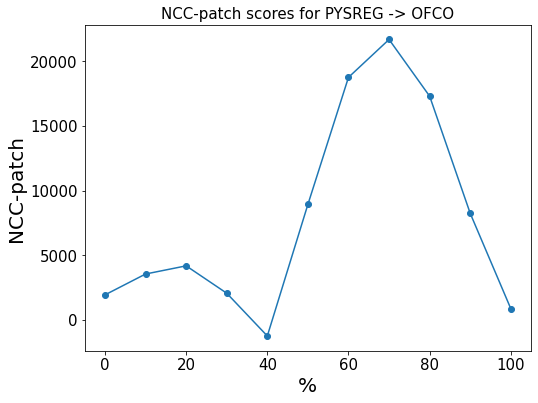

In [48]:
from tqdm import tqdm
N = 200

for path1, path2, name1, name2 in \
    zip([orig_examples[1], orig_examples[1], pystackreg_examples[1]],
        [warped_examples[1], pystackreg_examples[1], warped_examples[1]],
        ['RAW', 'RAW', 'PYSREG'],
        ['OFCO', 'PYSREG', 'OFCO']):
    image1 = tiff.imread(path1, key=range(N))
    image2 = tiff.imread(path2, key=range(N))

    scores = []
    ran = np.arange(0, N+1, N//10)
    for i in tqdm(ran):
        image = np.concatenate([image1[:N-i], image2[:i]])
        image = image - image.mean(axis=0)
        score = patch_ncc(image)
        scores += [score]

    plt.figure(figsize=(8, 6))
    plt.plot(ran / N * 100, scores, '-o')
    plt.title(f'NCC-patch scores for {name1} -> {name2}')
    plt.xlabel(r'%')
    plt.ylabel(r'NCC-patch')
    plt.show()